In [4]:
import requests
import json
import pandas as pd 
import breakout_detection 
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
import datetime
from sqlalchemy import create_engine

In [10]:
db_engine = create_engine('{key}')
df = pd.read_sql('''select "date" as ds, sum("{metric") as y
from "{db}"
where "category"='{cat}' and
"date" between '2019-01-01' and '2021-12-31' and
"country"='{country}'
group by "date"
order by "date" desc;''', db_engine)

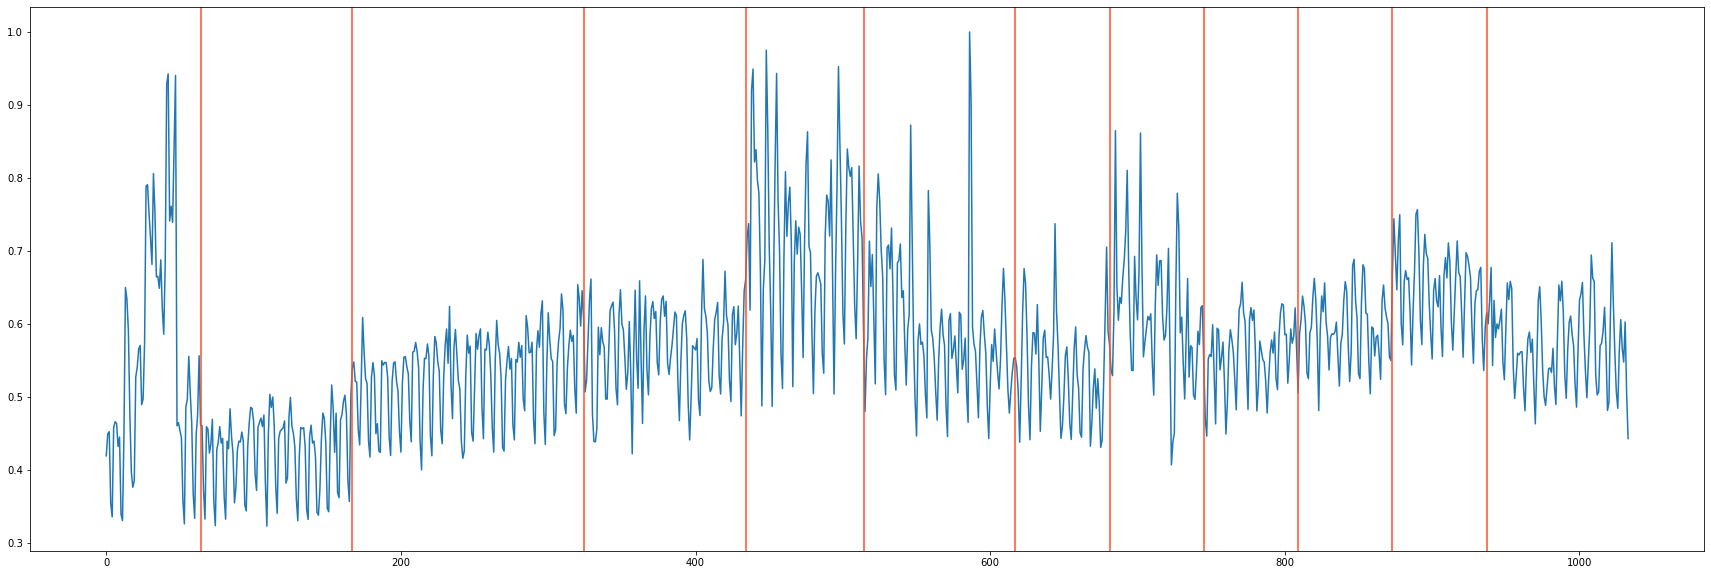

In [11]:
edm_multi = breakout_detection.EdmMulti()  
max_df = max(max(df['value']),1) 
Z = [x/float(max_df) for x in df['value']] 
edm_multi.evaluate(Z, min_size=64, beta=0.00001, degree=1) 
df['value'].plot(figsize=(30,10)) 
for i in edm_multi.getLoc(): 
    plt.axvline(df['value'].index[i], color='#FF4E24')